In [1]:
########## install astropy, camb, and hmf
# !pip install astropy
# !pip install camb
# !pip install hmf

##### laternatively, install hmf from github
# !pip install hmf@git+git://github.com/steven-murray/hmf.git

###### note: in order to add neutrino mass, need to change line 212 in hmf/density_field/transfer_models.py
### from:
# omch2=(self.cosmo.Om0 - self.cosmo.Ob0) * self.cosmo.h ** 2,
### to:
### We assume neutrino hierarchy is degenerate
# also see: https://camb.readthedocs.io/en/latest/_modules/camb/model.html#CAMBparams
# omch2=(self.cosmo.Om0 - self.cosmo.Ob0 - self.cosmo.Onu0) * self.cosmo.h ** 2,
# mnu=sum(self.cosmo.m_nu.value),
# neutrino_hierarchy='degenerate',

In [2]:
import numpy as np
from pylab import *
import os
from astropy.cosmology import FlatLambdaCDM
from astropy import units as u
from hmf import MassFunction     # The main hmf class
from hmf import cosmo
from hmf import Transfer
%matplotlib inline

In [3]:
########## Quijote simulation parameter
om=0.3175
ob=0.049
h=0.6711
ns=0.9624
s8=0.834
mnu=0
mnu_ppp=0.4
w=-1

##### derived neutrino parameter
omnuh2_ppp = mnu_ppp/93.14 ### omega_nu * h^2 = m_nu / 93.14eV
print ('omega_nu',omnuh2_ppp / h**2)

##### mass bin parameters
Mmin=11
Mmax=16
dlog10m=0.01

omega_nu 0.009535627558449613


In [4]:
######## check all the parameters go into the massfunction
mf = MassFunction(z = 0, 
      cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu_ppp/3)},
      hmf_model="ST",
      sigma_8=s8, 
      Mmax=16,
      n=ns,
      takahashi=True)    

print (mf.cosmo_params, '\n',
       mf.sigma_8, mf.n)

####### display all the parameters go into the code, so we know what can be passed to the function
MassFunction.get_all_parameter_defaults()

{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0.13333333, 0.13333333, 0.13333333] eV>} 
 0.834 0.9624
'FlatLambdaCDM' object has no attribute '_defaults'
'NoneType' object has no attribute '_defaults'


{'cosmo_model': FlatLambdaCDM(name="Planck15", H0=67.7 km / (Mpc s), Om0=0.307, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.   0.   0.06] eV, Ob0=0.0486),
 'cosmo_params': {},
 'n': 0.9667,
 'sigma_8': 0.8159,
 'growth_params': {'dlna': 0.01, 'amin': 1e-08},
 'lnk_min': -18.420680743952367,
 'lnk_max': 9.903487552536127,
 'dlnk': 0.05,
 'z': 0.0,
 'transfer_model': hmf.density_field.transfer_models.CAMB,
 'transfer_params': {'camb_params': None,
  'dark_energy_params': {},
  'extrapolate_with_eh': False,
  'kmax': None},
 'takahashi': True,
 'growth_model': hmf.cosmology.growth_factor.GrowthFactor,
 'hmf_model': hmf.mass_function.fitting_functions.Tinker08,
 'Mmin': 10,
 'Mmax': 15,
 'dlog10m': 0.01,
 'mdef_model': None,
 'mdef_params': {},
 'delta_c': 1.686,
 'hmf_params': {'A_200': 0.1858659,
  'A_300': 0.1995973,
  'A_400': 0.2115659,
  'A_600': 0.2184113,
  'A_800': 0.2480968,
  'A_1200': 0.2546053,
  'A_1600': 0.26,
  'A_2400': 0.26,
  'A_3200': 0.26,
  'a_200': 1.466904,
  'a_300': 1.52178

In [5]:
print (mf.cosmo)
print (mf.cosmo.Om0, mf.cosmo.Onu0, mf.cosmo.Ob0, mf.cosmo.m_nu)

FlatLambdaCDM(name="Planck15", H0=67.1 km / (Mpc s), Om0=0.318, Tcmb0=2.725 K, Neff=3.05, m_nu=[0.13333333 0.13333333 0.13333333] eV, Ob0=0.049)
0.3175 0.009586274016952393 0.049 [0.13333333 0.13333333 0.13333333] eV


In [6]:
######## test Transfer functions, make sure they are different for 0 and nonzero neutrino masses - pass

# tr0 = Transfer(cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu/3)},
#           sigma_8=s8,
#           n=ns,)
# trp = Transfer(cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu_ppp/3)},
#           sigma_8=s8,
#           n=ns,)

# print (tr0.cosmo_params)
# print (trp.cosmo_params)
# print (tr0.transfer_function - trp.transfer_function)

In [7]:
############ generate HMF for various models

diff_arr = []
models = ['PS', 'ST', 'Tinker08']

for imodel in models:
    print (imodel)
    mf0 = MassFunction(z = 0, 
          cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*zeros(3)},
          hmf_model=imodel,
          sigma_8=s8, 
          Mmax=16,
          n=ns,
          takahashi=True)           
    mfp = MassFunction(z = 0,
          cosmo_params={"Om0":om, "Ob0":ob,"H0":100*h, "m_nu":u.eV*ones(3)*(mnu_ppp/3)},
          hmf_model=imodel,
          Mmax=16,
          sigma_8=s8,
          n=ns,
          takahashi=True) 
    diff_arr.append([mf0.m, (mfp.dndlog10m-mf0.dndlog10m)/mnu_ppp])

PS
ST
Tinker08


In [8]:
print (mf0.cosmo_params, 'sigma8:', mf0.sigma_8)

print (mfp.cosmo_params, 'sigma8:', mfp.sigma_8)

{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0., 0., 0.] eV>} sigma8: 0.834
{'Om0': 0.3175, 'Ob0': 0.049, 'H0': 67.11, 'm_nu': <Quantity [0.13333333, 0.13333333, 0.13333333] eV>} sigma8: 0.834


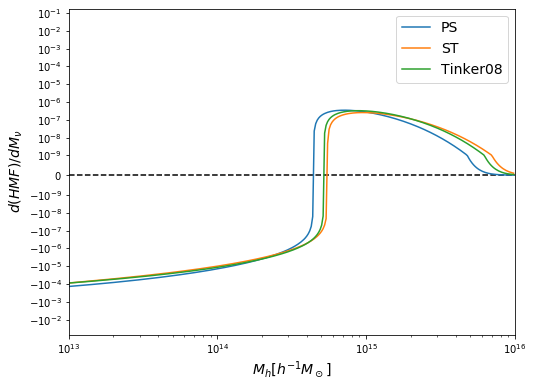

In [9]:
models = ['PS', 'ST', 'Tinker08']
figure(figsize=(8,6))
plot([1e13, 1e16],[0,0], 'k--')
for i in range(len(models)):
    plot(diff_arr[i][0], diff_arr[i][1], label=models[i])
xlim(1e13, 1e16)
yscale('symlog', linthreshy=1e-9)
xscale('log')
xlabel(r"$M_h [h^{-1}M_\odot]$",fontsize=14)
ylabel(r'$d(HMF) / dM_\nu$',fontsize=14)
legend(fontsize=14)
show()